# Exercise sheet 1

__Handout date:__ 18.04.2024  
__Submission deadline:__ 01.05.2024 - 23:59.  
__Submission link:__ https://fz-juelich.sciebo.de/s/4zGXGFzLfkZnl6R  
__Topics:__ Image processing.

Add your answers by editing the marked cells. Keep your answers brief and clear.

## General questions

__--- Question:__ Describe the issue that can arise when sampling a high-frequency continuous signal at discrete sampling points. 

__Answer:__
A low sampling rate might cause some high-frequency information to be overlapped in the discrete lower-frequency
signal, introducing unwanted information.

__--- Question:__ What is the name of this effect?

__Answer:__ Aliasing

__--- Question:__ How is this sampling issue relevant for image acquisition? 

__Answer:__ Aliasing might introduce patterns which does not obtain in the original file during downsampling or resizing image to a smaller resolution.

__--- Question:__ Describe one possible approach to address the sampling issue.

__Answer:__ We may smooth the signal to a lower frequency before down-sampling.

__---__Question:__ Question:__ What defines a pixel?

__Answer:__ A tuple of positions and values $(p, v)$

## Image transformations

__--- Task:__ Load and plot the camera man image from scikit-image.

__Answer:__

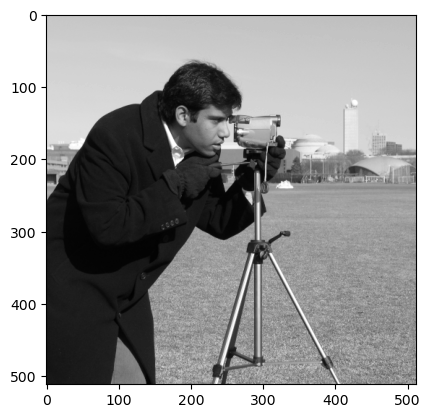

In [7]:
import skimage as ski
from matplotlib import pyplot as plt

cam = ski.data.camera()
plt.imshow(cam, cmap='gray')
plt.show()

__--- Task:__ Print the shape, dtype, and value range of the image.

__Answer:__ 

In [9]:
print(cam.shape)
print(cam.dtype)
print(cam.min(), cam.max())

(512, 512)
uint8
0 255


__--- Task:__ Plot the histogram of the image.

__Answer:__ 

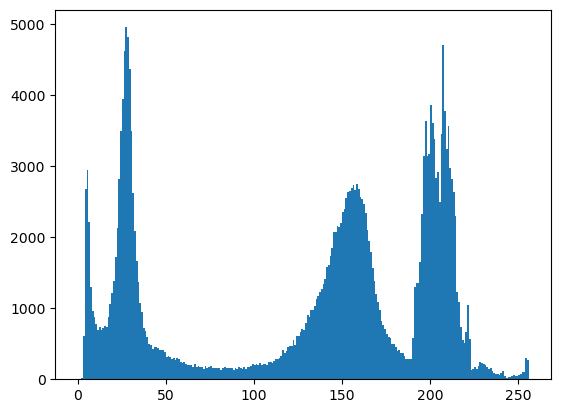

In [14]:
plt.hist(cam.flat, bins=256, range=(0, 256))
plt.show()

Suppose we want to apply a linear transformation $y = ax + b$ to all pixel intensities $x$ in the image.

__--- Question:__ What is the effect of the parameter $a$? 

__Answer:__ Scaling the pixel intensities by a factor of $a$. Here it might increase/decrease the contrast of the image

__--- Question:__ What is the effect of the parameter $b$? 

__Answer:__  increasing/decreasing the intensities by a fixed number of $b$. Here it might increase/decrease the brightness of the image

__--- Task:__ Linearly transform the camera image with all combinations of the parameters $a=[0.5, 1.0, 2.0]$ and $b=[-42, 0, +42]$. Visualize the results. Ensure that the effect of the transformation is visible in the images!

__Answer:__ 

a=0.5, b=-42


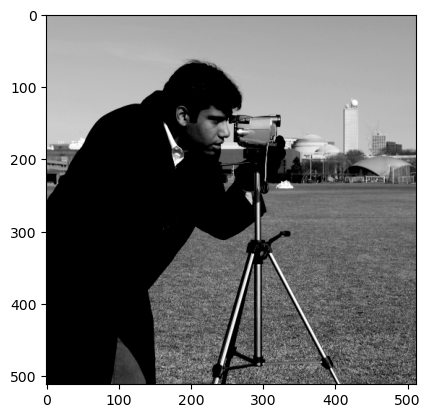

a=0.5, b=0


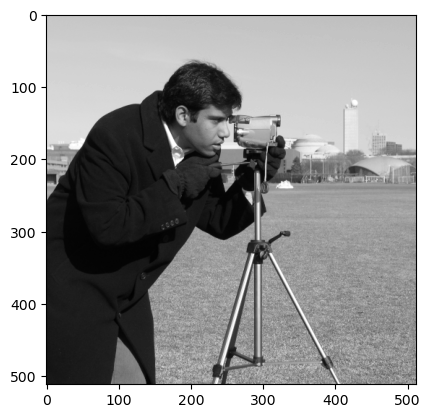

a=0.5, b=42


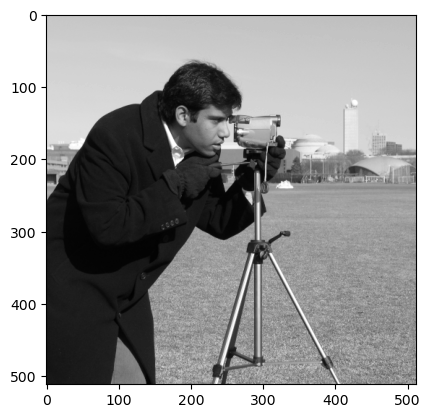

a=1.0, b=-42


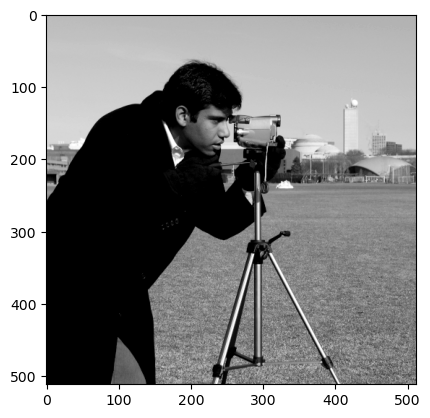

a=1.0, b=0


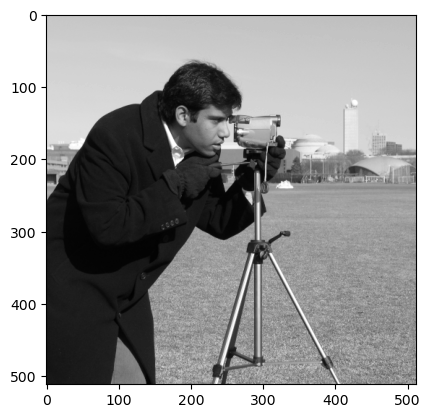

a=1.0, b=42


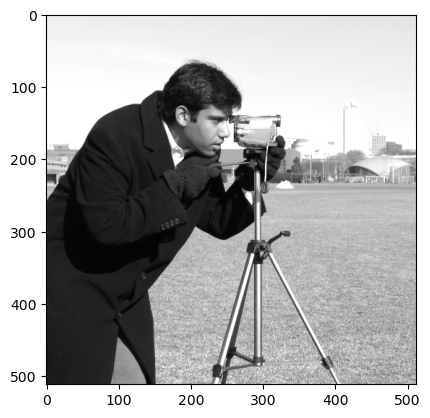

a=2.0, b=-42


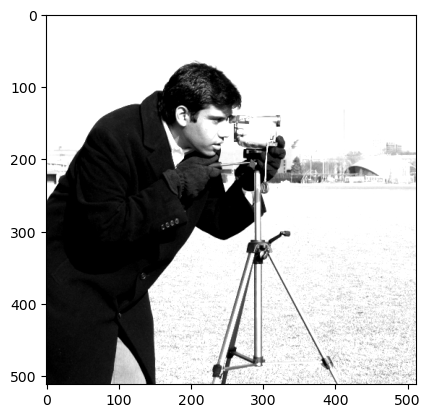

a=2.0, b=0


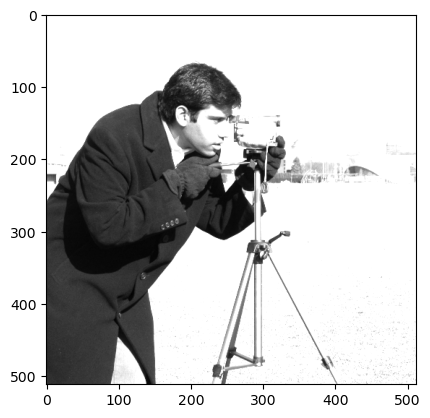

a=2.0, b=42


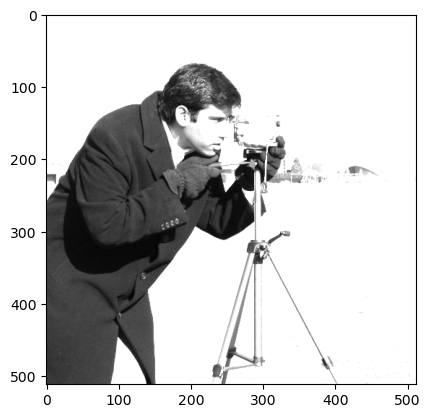

In [24]:
a = [0.5, 1.0, 2.0]
b = [-42, 0, 42]

for i in a:
    for j in b:
        print(f"a={i}, b={j}")
        cam_temp = cam * i + j
        cam_temp = cam_temp.clip(0, 255)
        plt.imshow(cam_temp, cmap='gray')
        plt.show()

__--- Task:__ Plot the histograms of the transformed images. __Tip:__ Use `inset_axes` in matplotlib to overlay the histogram onto the image.

__Answer:__ 

a=0.5, b=-42


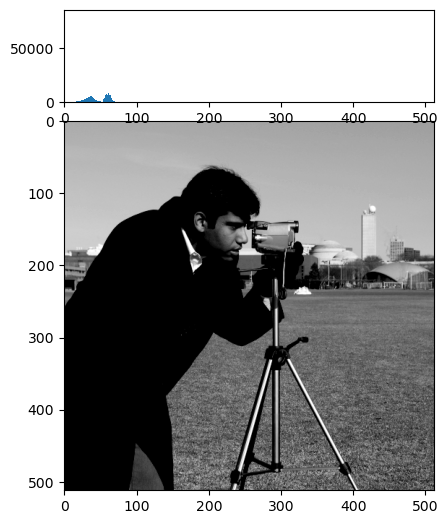

a=0.5, b=0


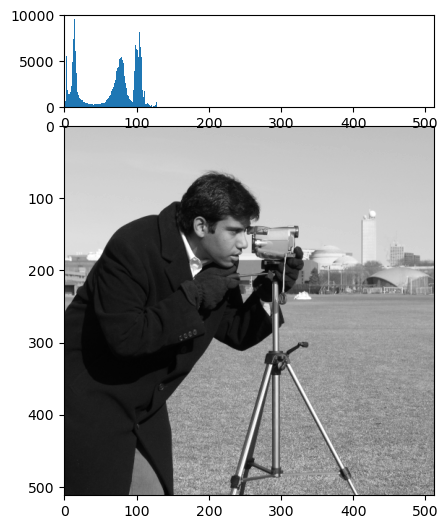

a=0.5, b=42


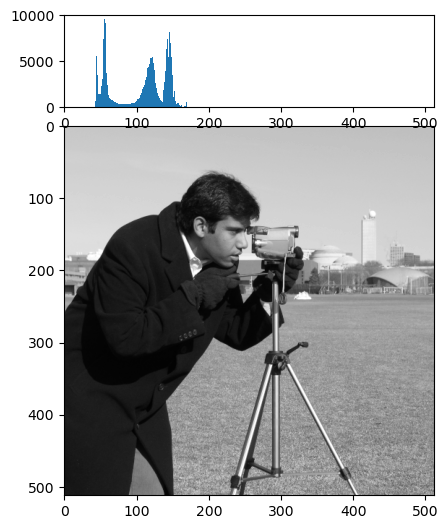

a=1.0, b=-42


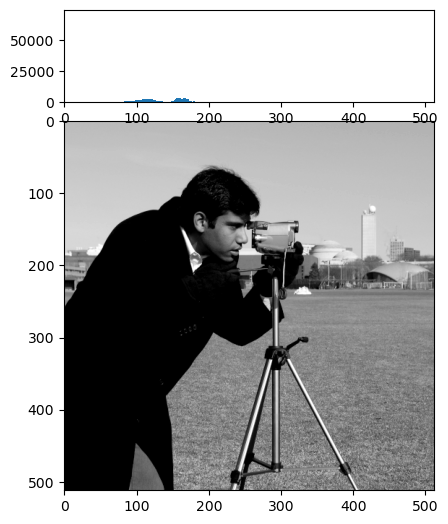

a=1.0, b=0


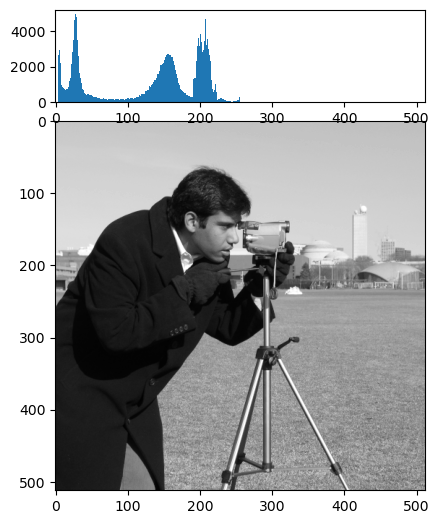

a=1.0, b=42


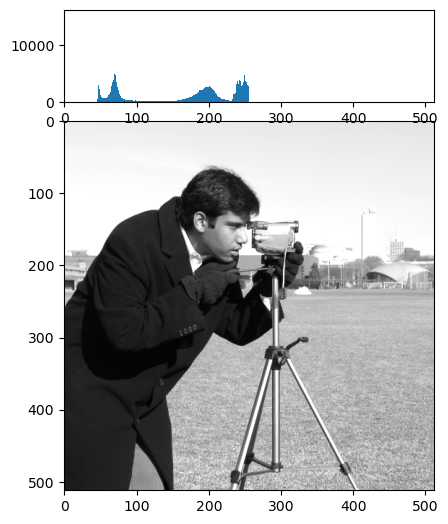

a=2.0, b=-42


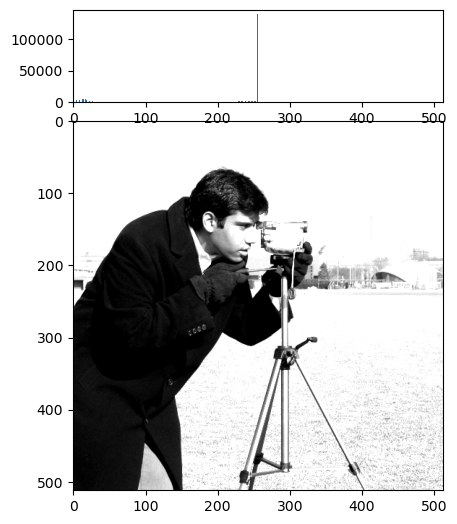

a=2.0, b=0


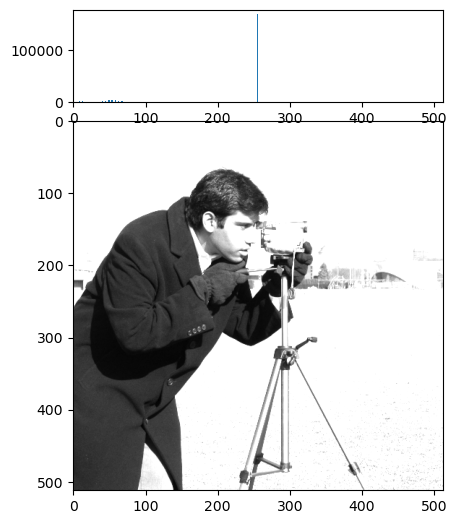

a=2.0, b=42


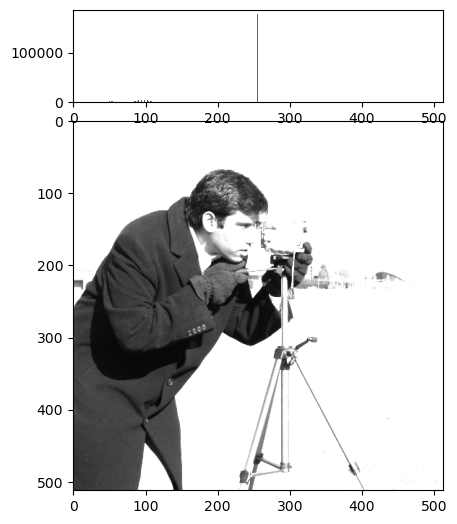

In [36]:
for i in a:
    for j in b:
        fig, ax = plt.subplots(1, 1)
        print(f"a={i}, b={j}")
        cam_temp = cam * i + j
        cam_temp = cam_temp.clip(0, 255)
        ax.imshow(cam_temp, cmap="gray")
        axx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
        # axy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
        axx.hist(cam_temp.flat, bins=256, range=(0, 256))
        # axy.hist(cam_temp.flat, bins=256, range=(0, 256), orientation='horizontal')
        plt.show()

__--- Question:__ When linearly transforming an image, which issues can be expected regarding the used data type and visualization?

__Answer:__ The values after transformation could exceeds the original range (in this example $[0, 255]$), leading to a wrong interpretation of the values.

## Homogenous coordinates

__--- Task:__ Represent the 2D point with coordinates $p=[2, 1]$ in homogenous coordinates.

__Answer:__  $\bm{\tilde{p}} = \tilde{w} [2, 1, 1]$

In [39]:
import numpy as np
p_t = np.array([2, 1, 1])

__--- Task:__ Define a transformation matrix $A$ that translates the point $p$ by $[1, 2]$

__Answer:__ 

In [42]:
A = np.array([[1, 0, 1],
              [0, 1, 2],
              [0, 0, 1]])

array([3, 3, 1])

__--- Task:__ Use $A$ to transform the point $p$.

__Answer:__ 

In [44]:
A@p_t

array([3, 3, 1])

__--- Task:__ Consider the following list of 2D points $X$. Transform all points using the matrix $A$ using __a single__ matrix multiplication.

__Answer:__ 

In [61]:
import numpy as np
X = np.arange(20).reshape(10, 2)
X_hom = np.hstack([X, np.ones([10,1])])
X_hom@A.T

array([[ 1.,  3.,  1.],
       [ 3.,  5.,  1.],
       [ 5.,  7.,  1.],
       [ 7.,  9.,  1.],
       [ 9., 11.,  1.],
       [11., 13.,  1.],
       [13., 15.,  1.],
       [15., 17.,  1.],
       [17., 19.,  1.],
       [19., 21.,  1.]])

__--- Task:__ Define a rotation matrix $R$ with rotation angle $\theta=\pi$.

__Answer:__ 

In [62]:
R = np.array([[-1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

__--- Task:__ Create a matrix $S$ that first translates a point $p$ by $[1, 2]$ and then rotates it by $\pi$.

__Answer:__ 

In [65]:
S = A@R
S

array([[-1,  0,  1],
       [ 0,  1,  2],
       [ 0,  0,  1]])

__--- Question:__ Briefly define the properties of the following types of transformations by describing how the spatial relationship of lines is affected by the respective transformation (1P per correct answer).   

__Answer:__ 

- Rigid transformation: The lengths of lines and the shape of geometry are preserved.
- Similarity transformation: The shape of the geomety are preserved, but length is not (geometry is scaled)
- Affine transformation: Even the shape is not preserved. Yet the parrallel relationship between lines are preserved.
- Perspective transformation: Even the parrellel relationship between lines are not preserved. Only the straightness is preserved.

## Rotating an image

The goal of this task is to rotate in image.  
__Note:__ In practice, you would use more efficient implementations, but for educational purposes, we will here implement the rotation ourselves.

__--- Task:__ Define a rotation matrix $R$ with rotation angle $\theta=45°$. 

__Answer:__ 

In [104]:
theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta) , 0],
              [np.sin(theta), np.cos(theta), 0],
              [0, 0, 1]])

R

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

__--- Task:__ Create a list of points containing all pixel coordinates of the camera man image you loaded before. __Note:__ Mind the order of $x$ and $y$!

__Answer:__ 

In [105]:
coord = np.indices((cam.shape[0],cam.shape[1])).reshape(2,-1).T
coord

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [511, 509],
       [511, 510],
       [511, 511]])

__--- Task:__ Convert the points to homogenous coordinates.

__Answer:__ 

In [106]:
coord = np.hstack([coord, np.ones([coord.shape[0],1])])
coord

array([[  0.,   0.,   1.],
       [  0.,   1.,   1.],
       [  0.,   2.,   1.],
       ...,
       [511., 509.,   1.],
       [511., 510.,   1.],
       [511., 511.,   1.]])

__--- Task:__ Apply the transformation matrix $R$ to the list of points.

__Answer:__ 

In [107]:
coord_t = coord@R.T

In [108]:
coord_t

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.07106781e-01,  7.07106781e-01,  1.00000000e+00],
       [-1.41421356e+00,  1.41421356e+00,  1.00000000e+00],
       ...,
       [ 1.41421356e+00,  7.21248917e+02,  1.00000000e+00],
       [ 7.07106781e-01,  7.21956024e+02,  1.00000000e+00],
       [ 5.10702591e-14,  7.22663130e+02,  1.00000000e+00]])

__--- Task:__ Create the transformed image by writing each pixel value to the transformed pixel position.  
__Notes:__
- Use rounding to obtain proper values for indexing.
- Remember to handle pixels that end up outside the target image.

__Answer:__ 

coord_t[0,0] = 0,0
coord_t[0,1] = 0,0
coord_t[0,2] = 0,0
coord_t[0,3] = 0,0
coord_t[0,4] = 0,0
coord_t[0,5] = 0,0
coord_t[0,6] = 0,0
coord_t[0,7] = 0,0
coord_t[0,8] = 0,0
coord_t[0,9] = 0,0
coord_t[0,10] = 0,0
coord_t[0,11] = 0,0
coord_t[0,12] = 0,0
coord_t[0,13] = 0,0
coord_t[0,14] = 0,0
coord_t[0,15] = 0,0
coord_t[0,16] = 0,0
coord_t[0,17] = 0,0
coord_t[0,18] = 0,0
coord_t[0,19] = 0,0
coord_t[0,20] = 0,0
coord_t[0,21] = 0,0
coord_t[0,22] = 0,0
coord_t[0,23] = 0,0
coord_t[0,24] = 0,0
coord_t[0,25] = 0,0
coord_t[0,26] = 0,0
coord_t[0,27] = 0,0
coord_t[0,28] = 0,0
coord_t[0,29] = 0,0
coord_t[0,30] = 0,0
coord_t[0,31] = 0,0
coord_t[0,32] = 0,0
coord_t[0,33] = 0,0
coord_t[0,34] = 0,0
coord_t[0,35] = 0,0
coord_t[0,36] = 0,0
coord_t[0,37] = 0,0
coord_t[0,38] = 0,0
coord_t[0,39] = 0,0
coord_t[0,40] = 0,0
coord_t[0,41] = 0,0
coord_t[0,42] = 0,0
coord_t[0,43] = 0,0
coord_t[0,44] = 0,0
coord_t[0,45] = 0,0
coord_t[0,46] = 0,0
coord_t[0,47] = 0,0
coord_t[0,48] = 0,0
coord_t[0,49] = 0,0
coord_t[0,

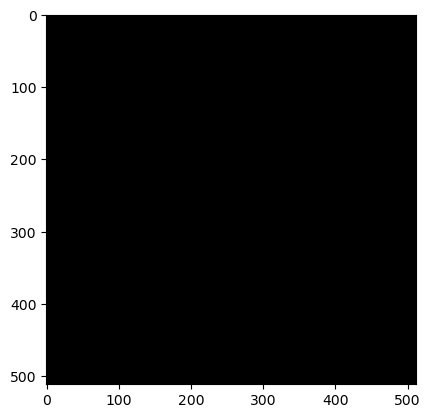

In [103]:
coord_t = coord_t.round().astype(int)
cam_t = np.zeros_like(cam)
for i in range(cam_t.shape[0]):
    for j in range(cam_t.shape[1]):
        if coord_t[i,0] >= 0 and coord_t[i,0] < cam.shape[0] and coord_t[i,1] >= 0 and coord_t[i,1] < cam.shape[1]:
            print(f"coord_t[{i},{j}] = {coord_t[i,0]},{coord_t[i,1]}")
            cam_t[coord_t[i,0],coord_t[i,1]] = cam[i,j]

plt.imshow(cam_t, cmap='gray')

__--- Question:__ The resampled image contains a fine pattern of black pixels. Explain the reason for this.

__Answer:__ 

__--- Question:__ What would be a suitable approach to prevent these artifacts?

__Answer:__ 

__--- Task:__ The used rotation matrix rotates the image around it's corner. Define a transformation matrix that rotates around the image center.

__Answer:__ 

## Image filtering

__--- Question:__ Which mathematical operation is often used for image filtering?

__Answer:__ convolution

__--- Task:__ Define a $3x3$ linear filter that computes the sum of a $3x3$ pixel grid at each position. 

__Answer:__ A $3 \times 3$ matrix with $1s$

__--- Task:__ Define a $3x3$ linear filter that computes the average of a $3x3$ pixel grid at each position. 

__Answer:__ The matrix above divided by $9$

__--- Question:__ Which of the following filters is linear?

__Answer:__ 

- Average: Linear
- Sum: Linear
- Median: Non-Linear
- Gaussian: Linear

__--- Question:__ What is the technical advantage of linear filters compared to non-linear  filters?

__Answer:__ 